In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(20160604)

%matplotlib inline

# データの用意[MSE-02]

In [39]:
from keras.datasets import mnist
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = mnist.load_data()

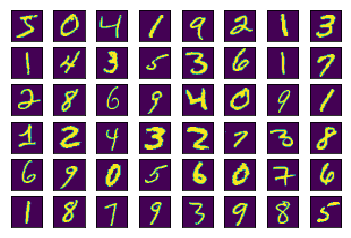

In [24]:
plt.figure()
for i in range(48):
    plt.subplot(6,8,i+1)
    # plt.title(y_train[i])
    plt.imshow(x_train[i].reshape([28,28]))
    plt.xticks([])
    plt.yticks([])
# plt.tight_layout()

In [40]:
# vectorに変換
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# int型からfloat型に変換
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# (0,1)に変換する。
x_train /= 255
x_test /= 255

# one-hotに。
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [43]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

# modelの設計 [MSE-03-6]

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [32]:
model = Sequential()
model.add(Dense(units=10, input_dim=784, kernel_initializer='zeros'))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Chapter2_2_model.png', show_shapes=True)

※マークダウンで表示してます。
<img src='Chapter2_2_model.png'>

# 学習 [MSE-06-7]

In [44]:
model.fit(x_train, y_train, batch_size=100, epochs=10,  verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 0.6141 - acc: 0.8586 - val_loss: 0.3581 - val_acc: 0.9060
Epoch 2/10
60000/60000 [==============================] - 0s - loss: 0.3439 - acc: 0.9059 - val_loss: 0.3075 - val_acc: 0.9146
Epoch 3/10
60000/60000 [==============================] - 0s - loss: 0.3080 - acc: 0.9149 - val_loss: 0.2888 - val_acc: 0.9191
Epoch 4/10
60000/60000 [==============================] - 0s - loss: 0.2916 - acc: 0.9191 - val_loss: 0.2790 - val_acc: 0.9222
Epoch 5/10
60000/60000 [==============================] - 0s - loss: 0.2808 - acc: 0.9212 - val_loss: 0.2719 - val_acc: 0.9233
Epoch 6/10
60000/60000 [==============================] - 0s - loss: 0.2738 - acc: 0.9236 - val_loss: 0.2703 - val_acc: 0.9248
Epoch 7/10
60000/60000 [==============================] - 0s - loss: 0.2688 - acc: 0.9249 - val_loss: 0.2684 - val_acc: 0.9252
Epoch 8/10
60000/60000 [==============================] - 0s 

# 可視化[MSE-08]

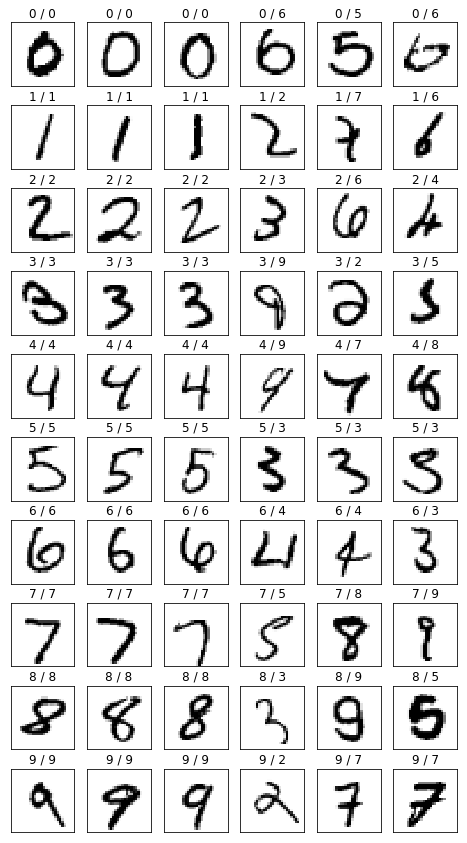

In [66]:
images = x_test.reshape(10000,28,28)
labels = y_test
p_val = model.predict(x_test)

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                           cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break